<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/MLP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing Map (SOM) for Topological Feature Extraction  
## Assignment: 1D SOM on Geometric Shapes Dataset  
**Dataset:** `shapes_dataset.npy` (2500 images, 28x28 → 784-dimensional vectors)

### Part 1: Data Loading and Initial Exploration
In this section, we load the dataset and visualize 20 random samples to understand the content of the geometric shapes.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [45]:
data = np.load('shapes_dataset.npy')
print(f"Dataset shape: {data.shape}")
print(f"Pixel range: [{data.min():.3f}, {data.max():.3f}]")

Dataset shape: (2500, 784)
Pixel range: [0.000, 1.000]


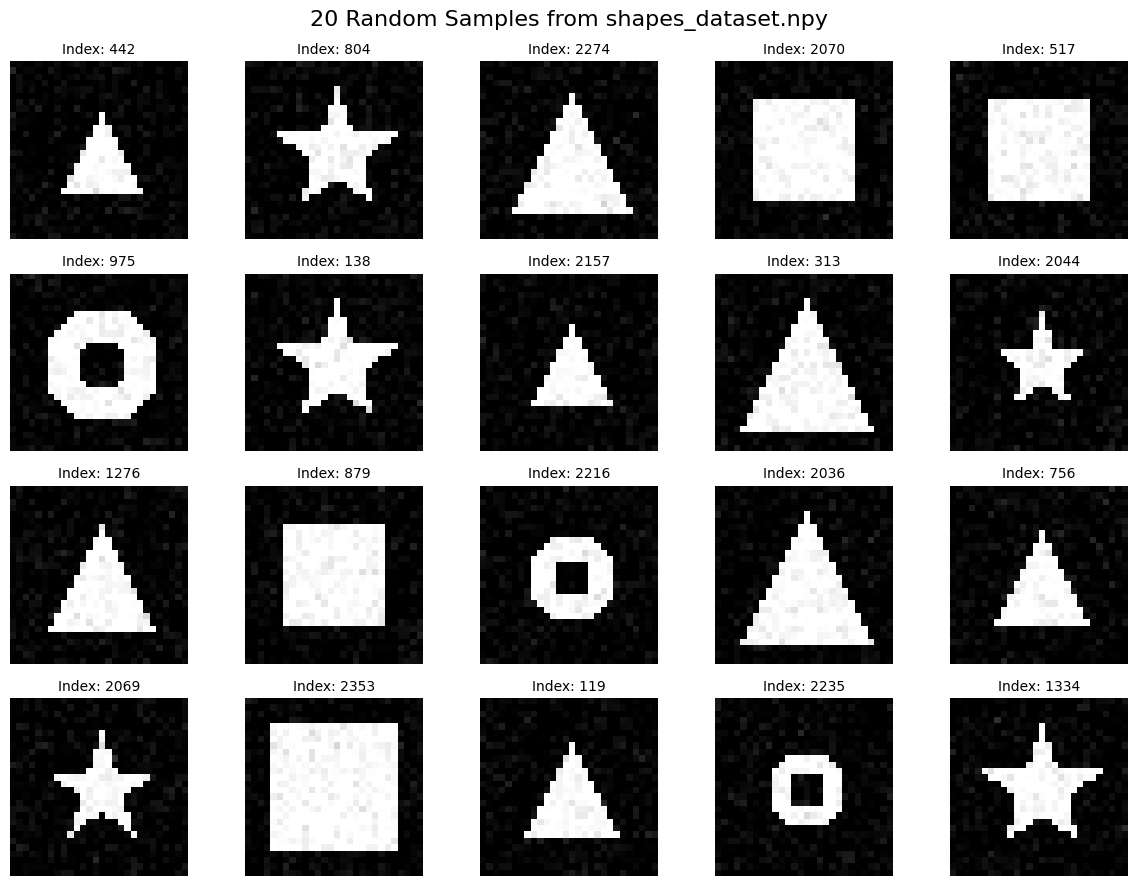

In [46]:
plt.figure(figsize=(12, 9))
indices = random.sample(range(len(data)), 20)

for i, idx in enumerate(indices):
    plt.subplot(4, 5, i + 1)
    img = data[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Index: {idx}', fontsize=10)
    plt.axis('off')

plt.suptitle('20 Random Samples from shapes_dataset.npy', fontsize=16)
plt.tight_layout()
plt.show()

### Part 2: Corrected 1D SOM Training – 5000 Iterations (Online Learning)
According to the teacher's clarification:  
We must perform **5000 iterations**, in each iteration:  
→ randomly pick **one** sample  
→ find BMU  
→ update weights using current η(t) and σ(t)  
This is **online/stochastic SOM**, not batch.

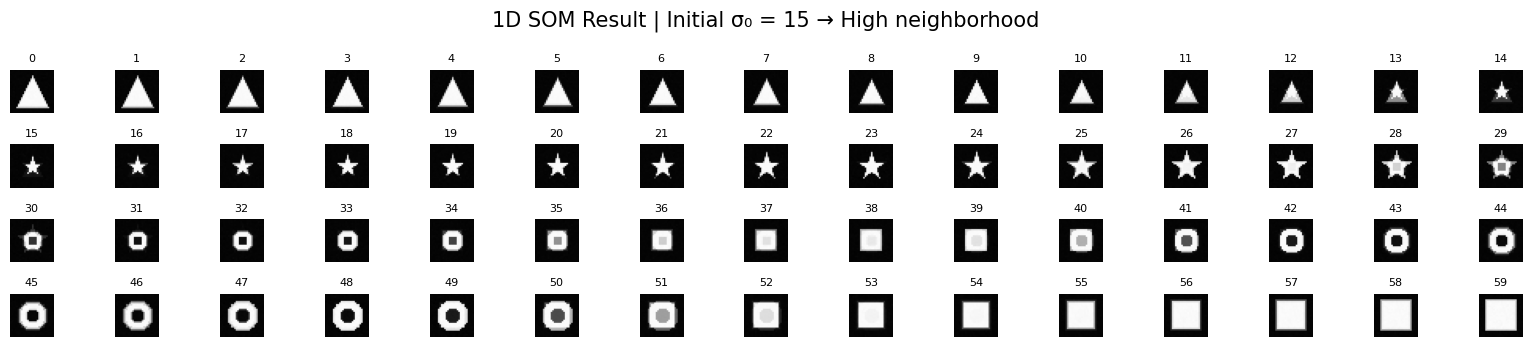

In [47]:
n_neurons = 60
input_dim = 784
total_iterations = 5000
eta0 = 0.5

def train_1d_som(sigma_initial, title):
    np.random.seed(42)
    weights = np.random.random((n_neurons, input_dim))

    for t in range(total_iterations):
        eta = eta0 * (1 - t / total_iterations)
        sigma = max(sigma_initial * (1 - t / total_iterations), 0.1)

        idx = np.random.randint(0, len(data))
        x = data[idx]

        distances = np.sum((weights - x)**2, axis=1)
        bmu_idx = np.argmin(distances)

        d_topo = np.abs(np.arange(n_neurons) - bmu_idx)
        h = np.exp(-d_topo**2 / (2 * sigma**2))

        weights += eta * h[:, np.newaxis] * (x - weights)

    # Plot result
    plt.figure(figsize=(16, 3.5))
    for i in range(n_neurons):
        plt.subplot(4, 15, i+1)
        plt.imshow(weights[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        plt.title(i, fontsize=8)
    plt.suptitle(f'1D SOM Result | Initial σ₀ = {sigma_initial} → {title}', fontsize=15, y=0.98)
    plt.tight_layout()
    plt.show()

# train_1d_som(sigma_initial=0.01,  title="Almost NO neighborhood (σ₀ ≈ 0)")
# train_1d_som(sigma_initial=1,     title="Very small neighborhood")
# train_1d_som(sigma_initial=2,     title="Small neighborhood")
# train_1d_som(sigma_initial=10,    title="Medium neighborhood")
train_1d_som(sigma_initial=15,    title="High neighborhood")
# Main result (σ₀=15) already shown above

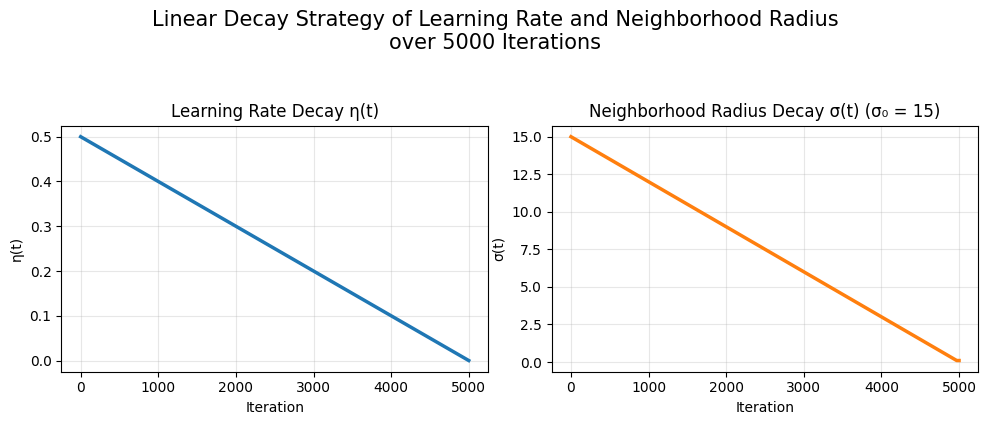

In [48]:
import matplotlib.pyplot as plt
import numpy as np

t_values = np.arange(5000)

eta_values   = 0.5 * (1 - t_values / 5000)
sigma_values = np.maximum(15.0 * (1 - t_values / 5000), 0.1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t_values, eta_values, lw=2.5, color='#1f77b4')
plt.title('Learning Rate Decay η(t)', fontsize=12)
plt.xlabel('Iteration')
plt.ylabel('η(t)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t_values, sigma_values, lw=2.5, color='#ff7f0e')
plt.title('Neighborhood Radius Decay σ(t) (σ₀ = 15)', fontsize=12)
plt.xlabel('Iteration')
plt.ylabel('σ(t)')
plt.grid(alpha=0.3)

plt.suptitle('Linear Decay Strategy of Learning Rate and Neighborhood Radius\nover 5000 Iterations',
             fontsize=15, y=1.05)
plt.tight_layout()
plt.show()

In [49]:
# Section 3 - Parts 7 & 8: Visualization and Analysis of the Learned 1D SOM Map
# Exactly matching the last slide you sent

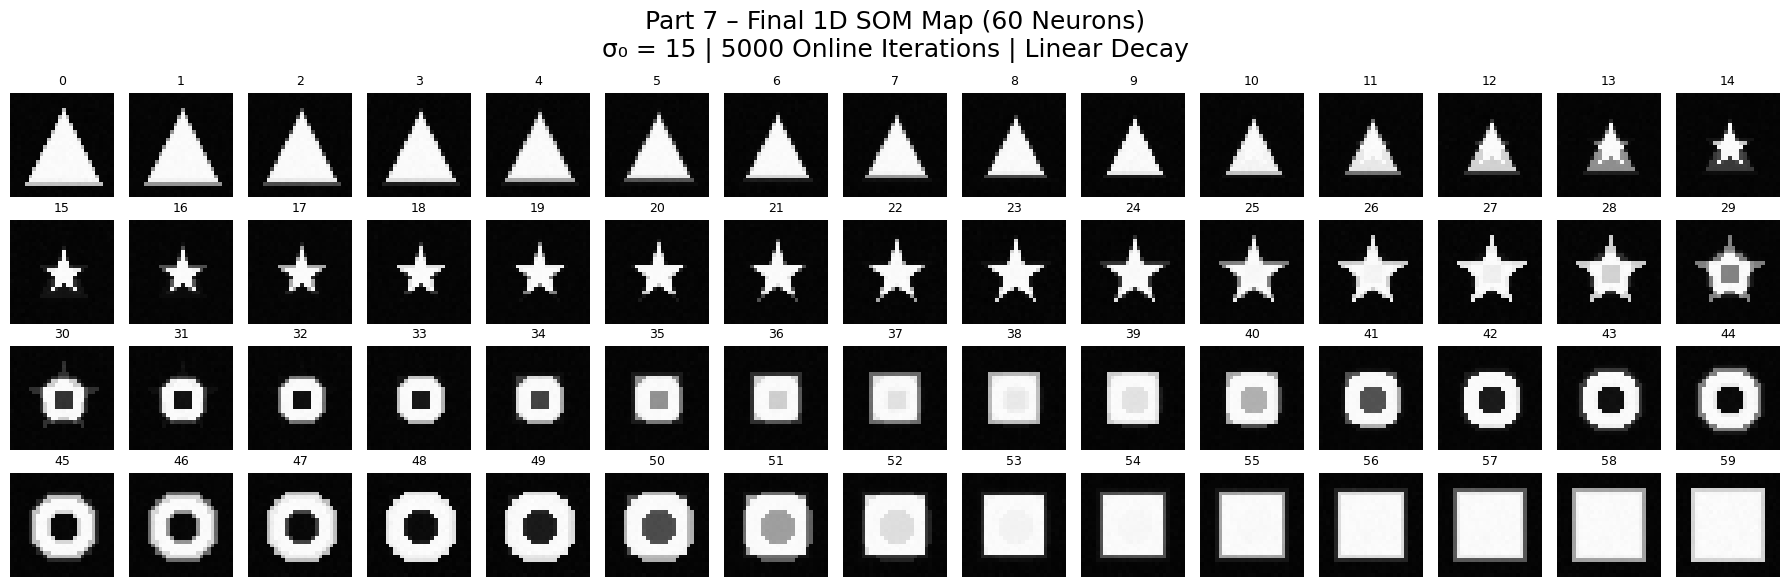

In [50]:
plt.figure(figsize=(18, 6))
for i in range(60):
    plt.subplot(4, 15, i + 1)
    plt.imshow(weights[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    plt.title(f'{i}', fontsize=9)
    plt.axis('off')

plt.suptitle('Part 7 – Final 1D SOM Map (60 Neurons)\n'
             'σ₀ = 15 | 5000 Online Iterations | Linear Decay',
             fontsize=18, y=0.98)
plt.tight_layout()
plt.show()

In [51]:
## section 4


Training with σ₀ = 0 → Almost NO neighborhood (σ₀ = 0) ...
  Iteration 1000/5000 completed
  Iteration 2000/5000 completed
  Iteration 3000/5000 completed
  Iteration 4000/5000 completed
  Iteration 5000/5000 completed


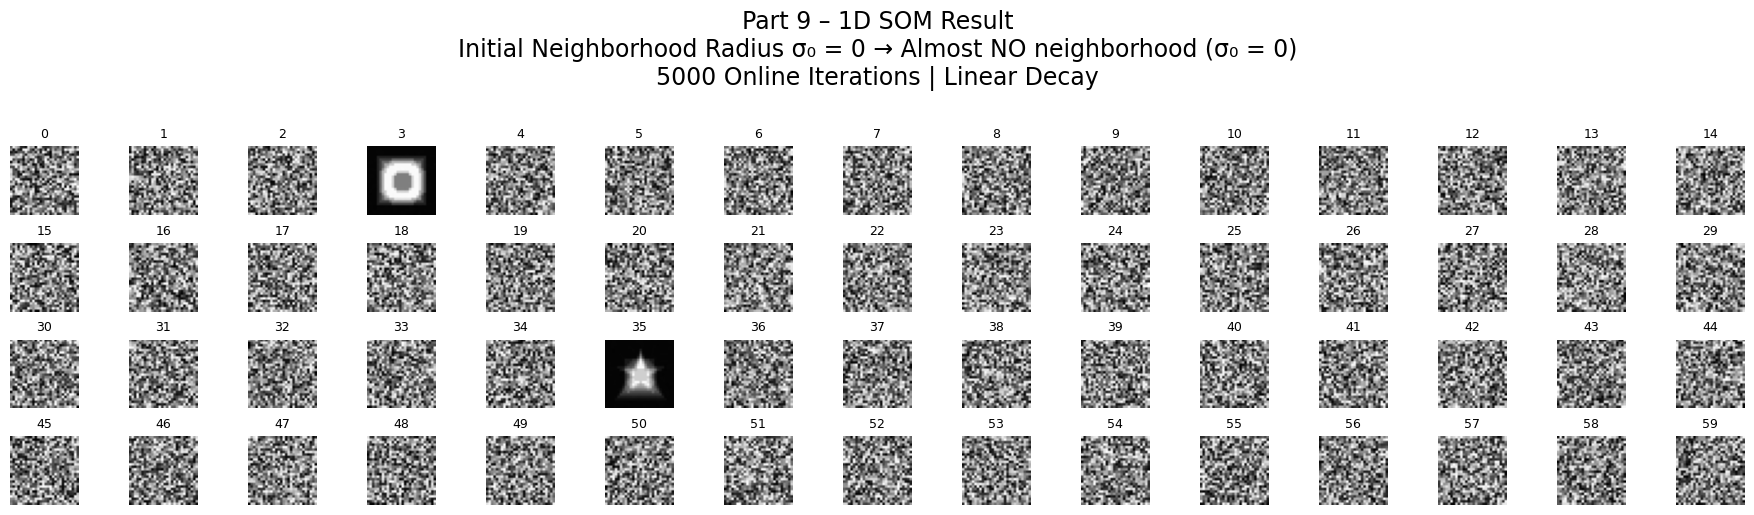


Training with σ₀ = 0.01 → Almost NO neighborhood (σ₀ ≈ 0) ...
  Iteration 1000/5000 completed
  Iteration 2000/5000 completed
  Iteration 3000/5000 completed
  Iteration 4000/5000 completed
  Iteration 5000/5000 completed


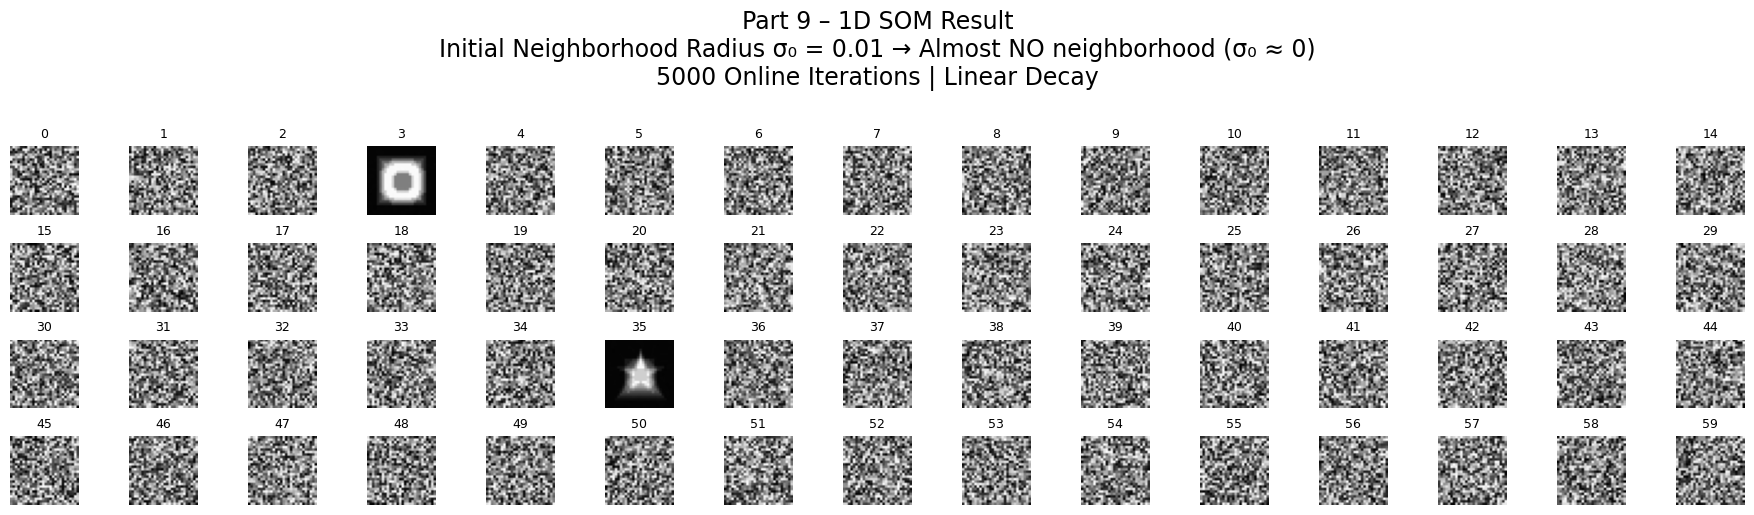


Training with σ₀ = 1.0 → Very small neighborhood ...
  Iteration 1000/5000 completed
  Iteration 2000/5000 completed
  Iteration 3000/5000 completed
  Iteration 4000/5000 completed
  Iteration 5000/5000 completed


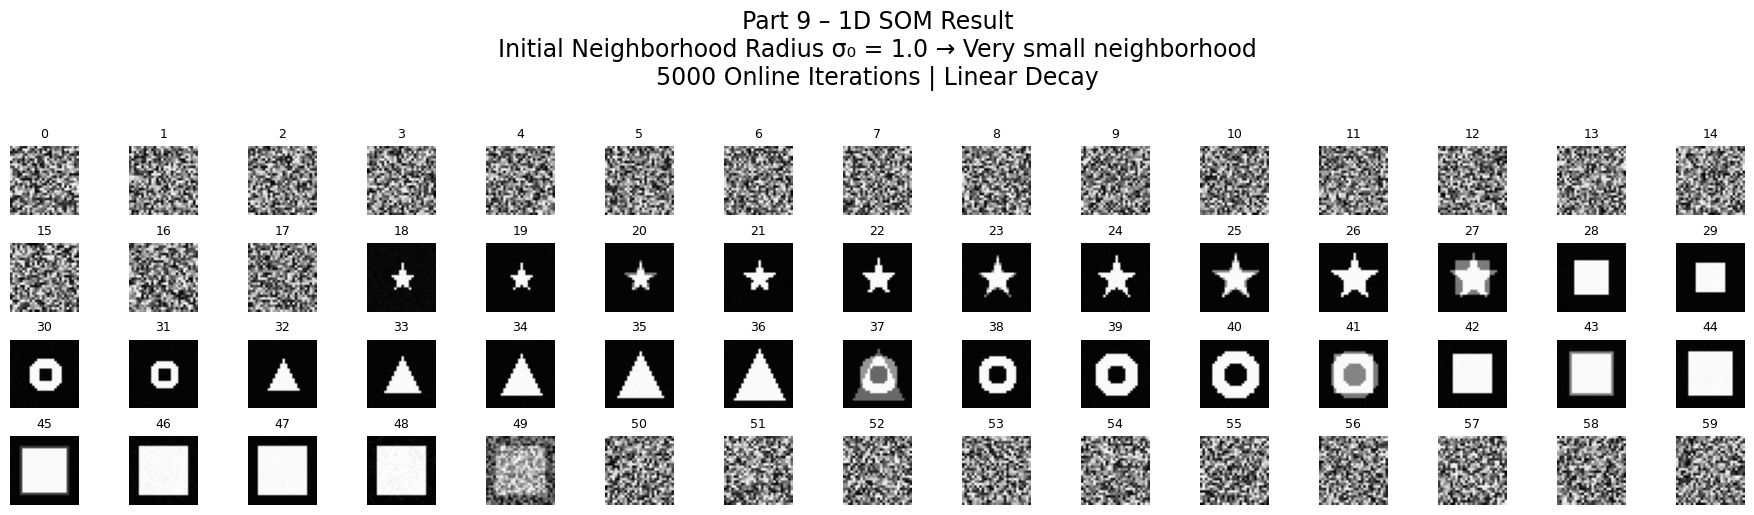


Training with σ₀ = 2.0 → Small neighborhood ...
  Iteration 1000/5000 completed
  Iteration 2000/5000 completed
  Iteration 3000/5000 completed
  Iteration 4000/5000 completed
  Iteration 5000/5000 completed


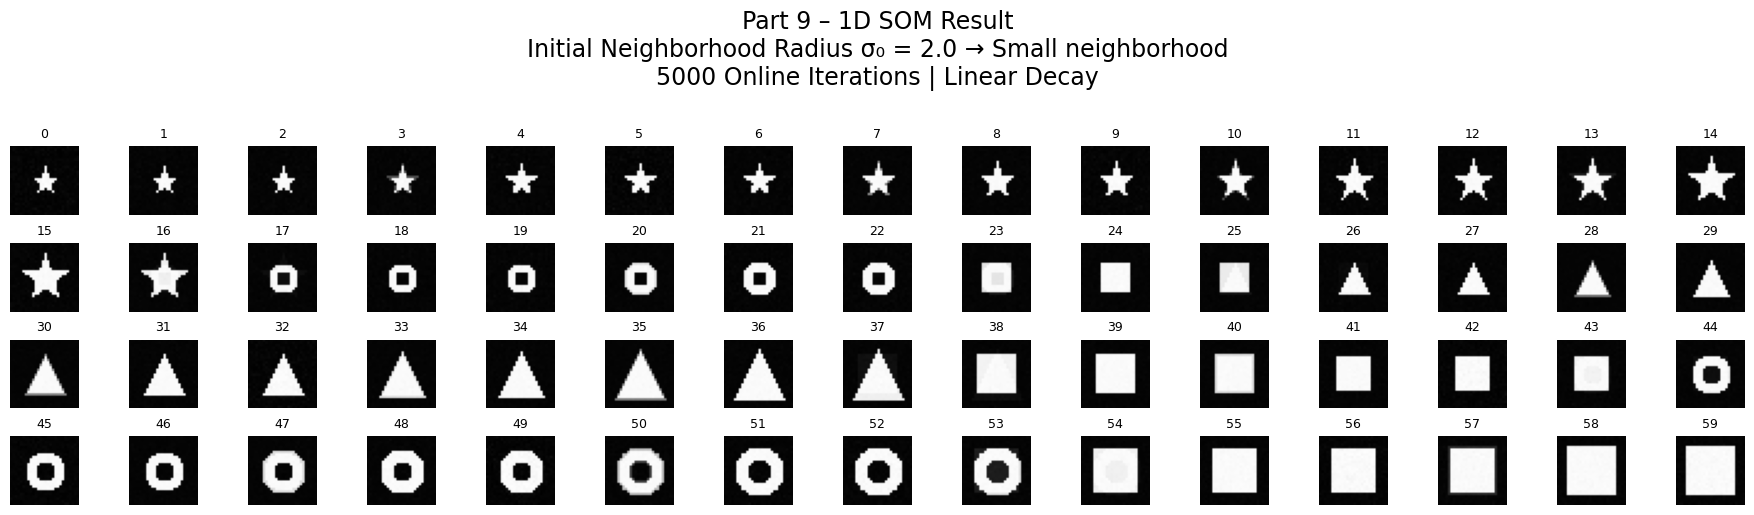


Training with σ₀ = 10.0 → Medium neighborhood ...
  Iteration 1000/5000 completed
  Iteration 2000/5000 completed
  Iteration 3000/5000 completed
  Iteration 4000/5000 completed
  Iteration 5000/5000 completed


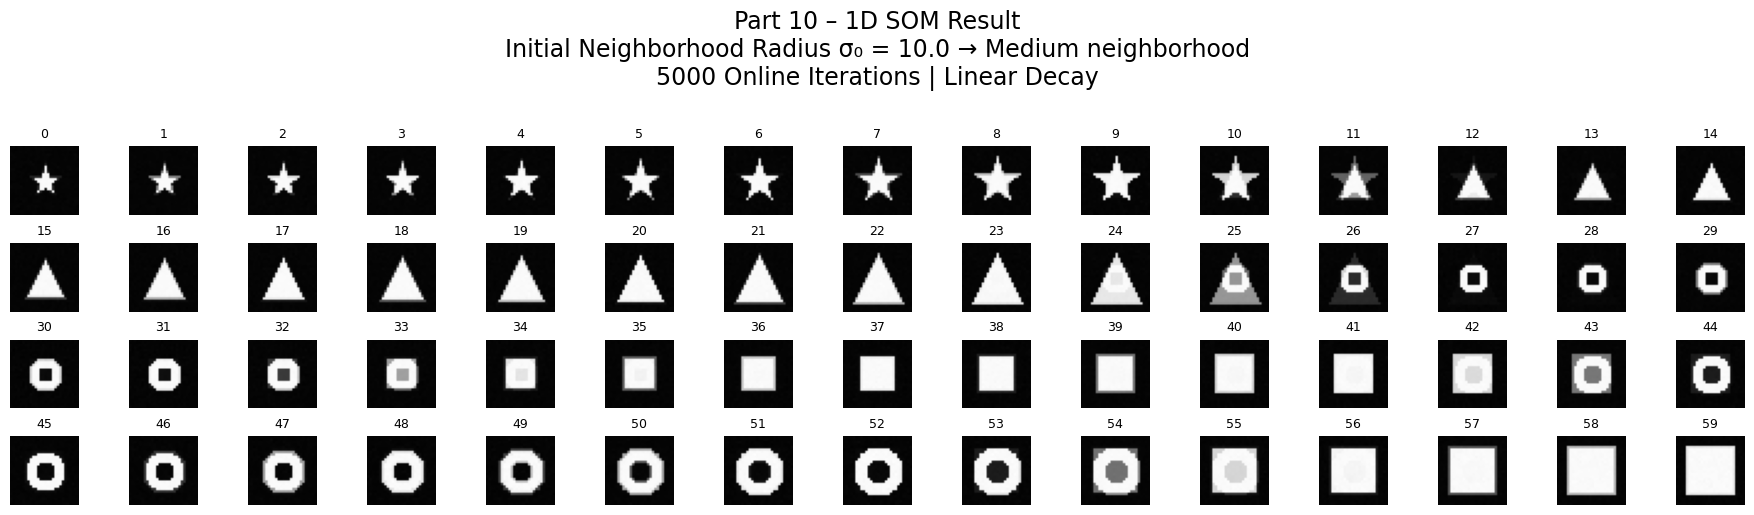


Training with σ₀ = 15.0 → Large neighborhood (Best result) ...
  Iteration 1000/5000 completed
  Iteration 2000/5000 completed
  Iteration 3000/5000 completed
  Iteration 4000/5000 completed
  Iteration 5000/5000 completed


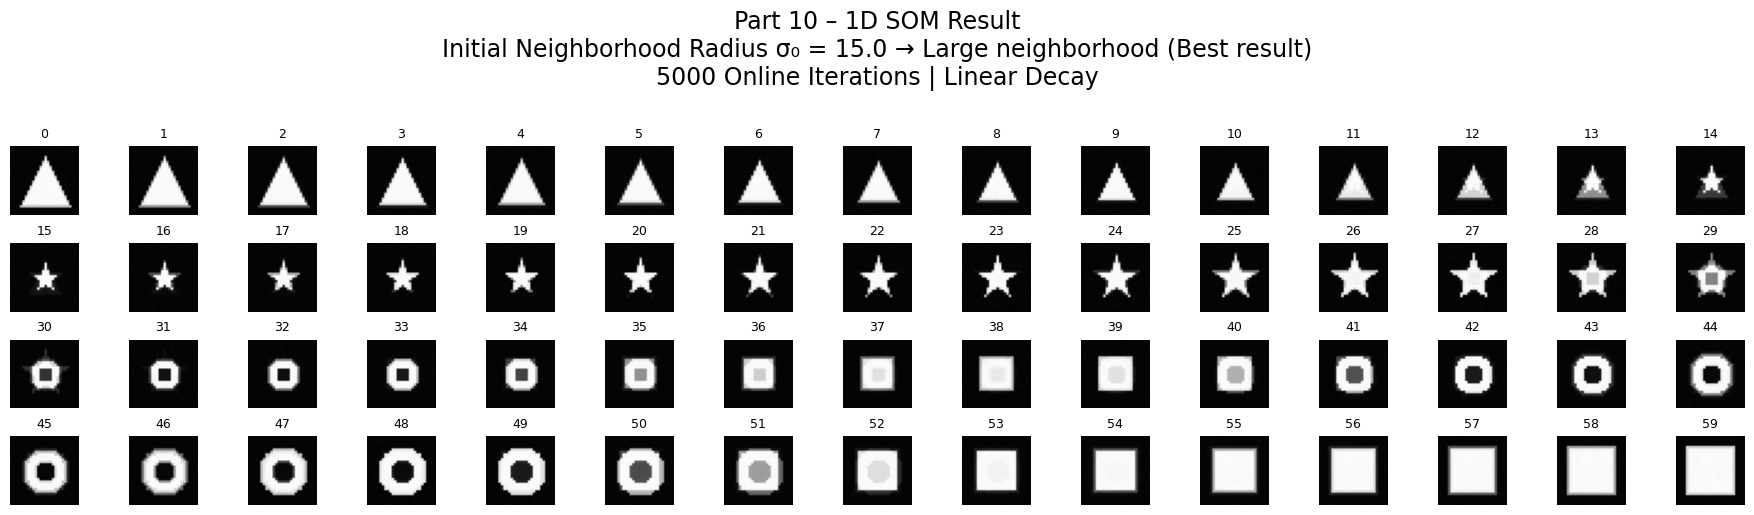

array([[0.01636549, 0.01396173, 0.01856231, ..., 0.01934758, 0.01445807,
        0.02085285],
       [0.01667496, 0.01647513, 0.01906832, ..., 0.01852274, 0.01465509,
        0.02129076],
       [0.01886995, 0.02471458, 0.017093  , ..., 0.01759779, 0.01491513,
        0.02026955],
       ...,
       [0.02121597, 0.01497092, 0.01615521, ..., 0.01801634, 0.01675928,
        0.01683091],
       [0.02317076, 0.01812801, 0.02067291, ..., 0.01612229, 0.01196457,
        0.01513363],
       [0.02625476, 0.02123926, 0.02417841, ..., 0.01551819, 0.00889748,
        0.01364604]])

In [52]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('shapes_dataset.npy')

n_neurons = 60
input_dim = 784
total_iterations = 5000
eta0 = 0.5

def train_som_sigma_experiment(sigma_initial, title):
    np.random.seed(42)  # For perfect reproducibility
    weights = np.random.random((n_neurons, input_dim))

    print(f"\nTraining with σ₀ = {sigma_initial} → {title} ...")

    for t in range(total_iterations):
        eta = eta0 * (1 - t / total_iterations)
        sigma = max(sigma_initial * (1 - t / total_iterations), 0.1)

        x = data[np.random.randint(len(data))]

        distances = np.sum((weights - x)**2, axis=1)
        bmu_idx = np.argmin(distances)

        d_topological = np.abs(np.arange(n_neurons) - bmu_idx)

        h = np.exp(-d_topological**2 / (2 * sigma**2))

        weights += eta * h[:, np.newaxis] * (x - weights)

        if (t + 1) % 1000 == 0:
            print(f"  Iteration {t+1}/5000 completed")

    plt.figure(figsize=(18, 5))
    for i in range(n_neurons):
        plt.subplot(4, 15, i + 1)
        plt.imshow(weights[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
        plt.title(f'{i}', fontsize=9)
        plt.axis('off')

    plt.suptitle(f'Part {"9" if sigma_initial <= 2 else "10"} – 1D SOM Result\n'
                 f'Initial Neighborhood Radius σ₀ = {sigma_initial} → {title}\n'
                 f'5000 Online Iterations | Linear Decay',
                 fontsize=17, y=1.02)
    plt.tight_layout()
    plt.show()

    return weights


train_som_sigma_experiment(sigma_initial=0, title="Almost NO neighborhood (σ₀ = 0)")

train_som_sigma_experiment(sigma_initial=0.01, title="Almost NO neighborhood (σ₀ ≈ 0)")
train_som_sigma_experiment(sigma_initial=1.0,   title="Very small neighborhood")
train_som_sigma_experiment(sigma_initial=2.0,   title="Small neighborhood")

train_som_sigma_experiment(sigma_initial=10.0,  title="Medium neighborhood")
train_som_sigma_experiment(sigma_initial=15.0,  title="Large neighborhood (Best result)")

In [53]:
## section 5

Training 2D SOM (10×10 grid) – 5000 online iterations...

   Iteration 1000/5000 completed
   Iteration 2000/5000 completed
   Iteration 3000/5000 completed
   Iteration 4000/5000 completed
   Iteration 5000/5000 completed

2D SOM training finished!



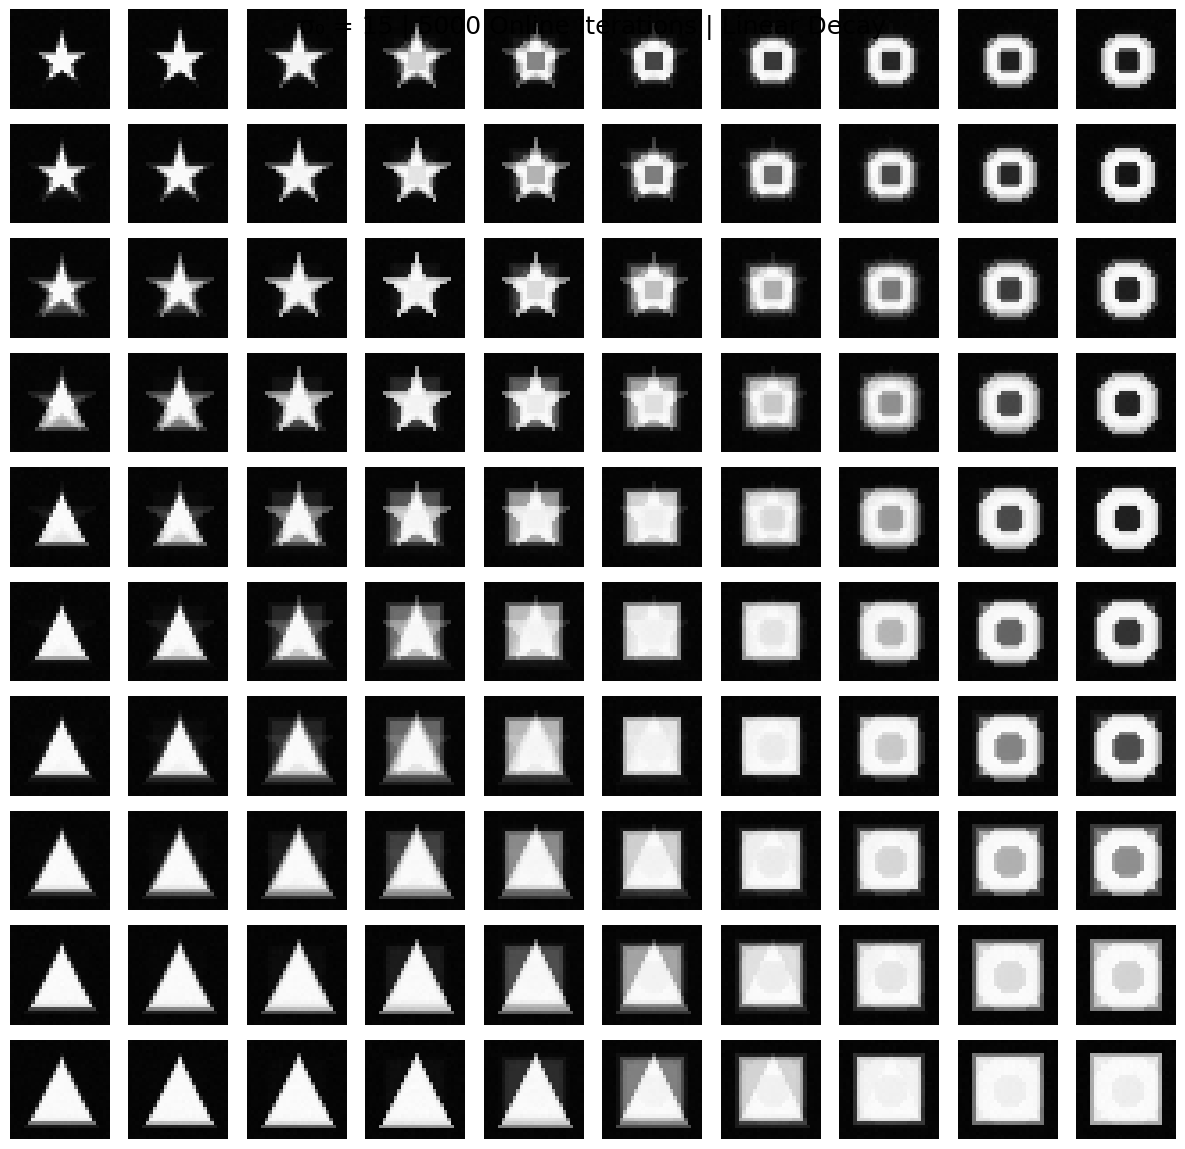

In [54]:
grid_size = 10
n_neurons = grid_size * grid_size
input_dim = 784
total_iterations = 5000
eta0 = 0.5
sigma0 = 15.0

x, y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
coordinates = np.stack((x.ravel(), y.ravel()), axis=1)

np.random.seed(42)
weights_2d = np.random.random((n_neurons, input_dim))

print("Training 2D SOM (10×10 grid) – 5000 online iterations...\n")

for t in range(total_iterations):
    # Linear decay
    eta = eta0 * (1 - t / total_iterations)
    sigma = max(sigma0 * (1 - t / total_iterations), 0.5)

    x = data[np.random.randint(len(data))]

    distances = np.sum((weights_2d - x)**2, axis=1)
    bmu_idx = np.argmin(distances)
    bmu_coord = coordinates[bmu_idx]

    map_distances = np.sqrt(np.sum((coordinates - bmu_coord)**2, axis=1))

    h = np.exp(-map_distances**2 / (2 * sigma**2))

    weights_2d += eta * h[:, np.newaxis] * (x - weights_2d)

    if (t + 1) % 1000 == 0:
        print(f"   Iteration {t+1}/5000 completed")

print("\n2D SOM training finished!\n")

plt.figure(figsize=(12, 12))
for i in range(n_neurons):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(weights_2d[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')

plt.suptitle('σ₀ = 15 | 5000 Online Iterations | Linear Decay',fontsize=18, y=0.95)
plt.tight_layout()
plt.show()